In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set plot style
plt.style.use('ggplot')
sns.set_palette('viridis')

Data Head:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Selected Features Head:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


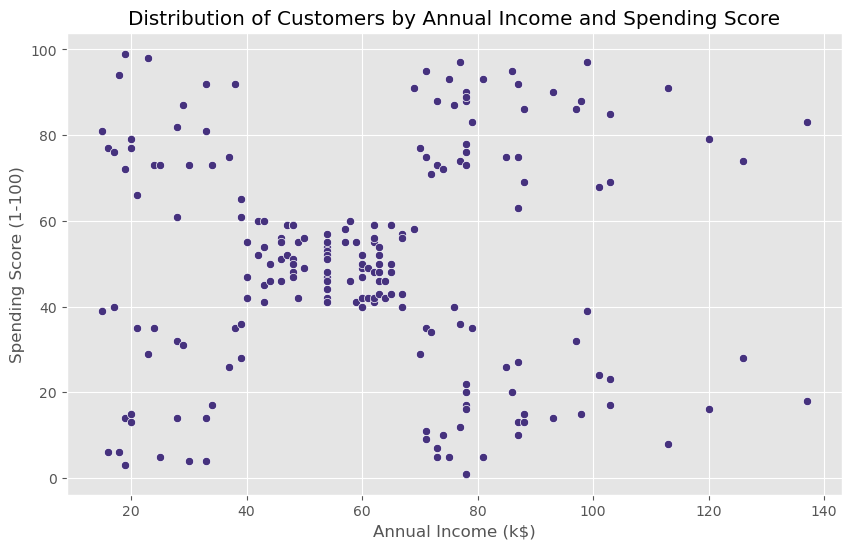

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\bond9\Downloads\archive (2)\Mall_Customers.csv")

# Inspect the data
print("Data Head:")
display(df.head())
print("\nData Info:")
df.info()

# For this analysis, we will focus on Annual Income and Spending Score
# Let's drop CustomerID and select the relevant features
X = df.iloc[:, [3, 4]]

print("\nSelected Features Head:")
display(X.head())

# Visualize the raw data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Distribution of Customers by Annual Income and Spending Score')
plt.show()

C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

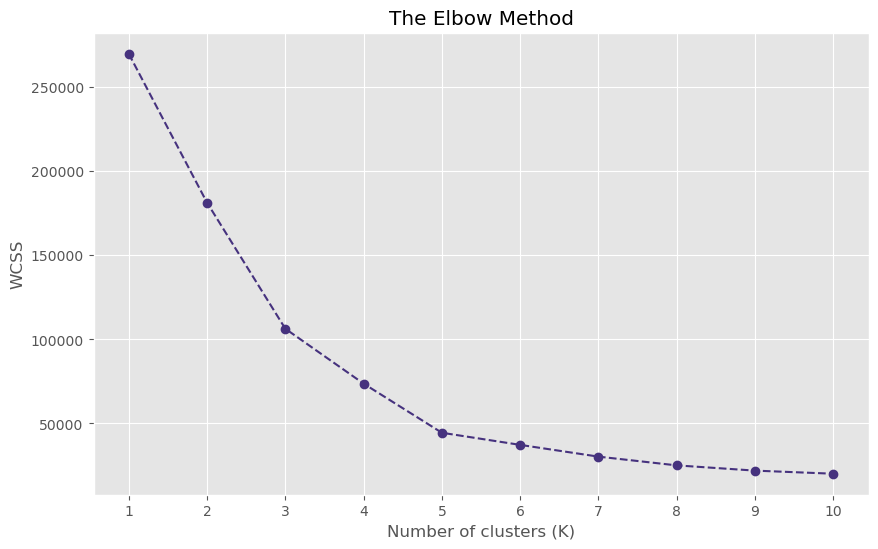

In [3]:
# We will find the optimal number of clusters (K) using the Elbow Method
# WCSS = Within-Cluster Sum of Squares

wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ gives the WCSS value

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


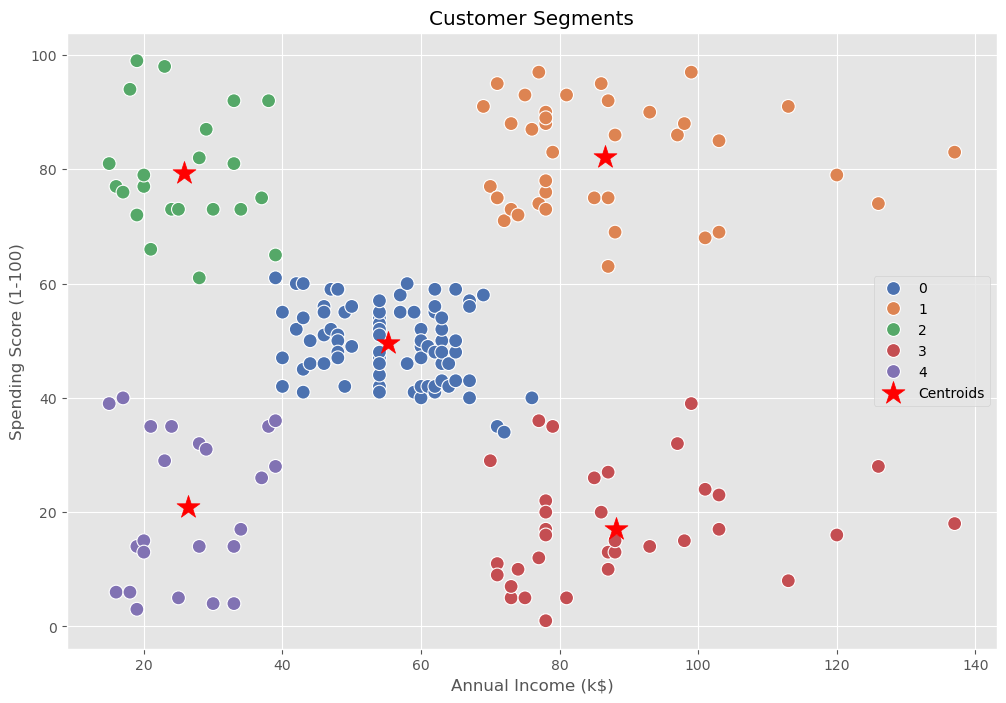

In [4]:
# Training the K-Means model with the optimal number of clusters (K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to our original selection
X_clustered = X.copy()
X_clustered['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_clustered, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [5]:
# The Silhouette Score measures how similar an object is to its own cluster
# compared to other clusters. The score ranges from -1 to +1, where a high
# value indicates that the object is well matched to its own cluster and
# poorly matched to neighboring clusters.

score = silhouette_score(X, y_kmeans)
print(f"The Silhouette Score for K={optimal_k} is: {score:.4f}")

The Silhouette Score for K=5 is: 0.5539


C:\Users\bond9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


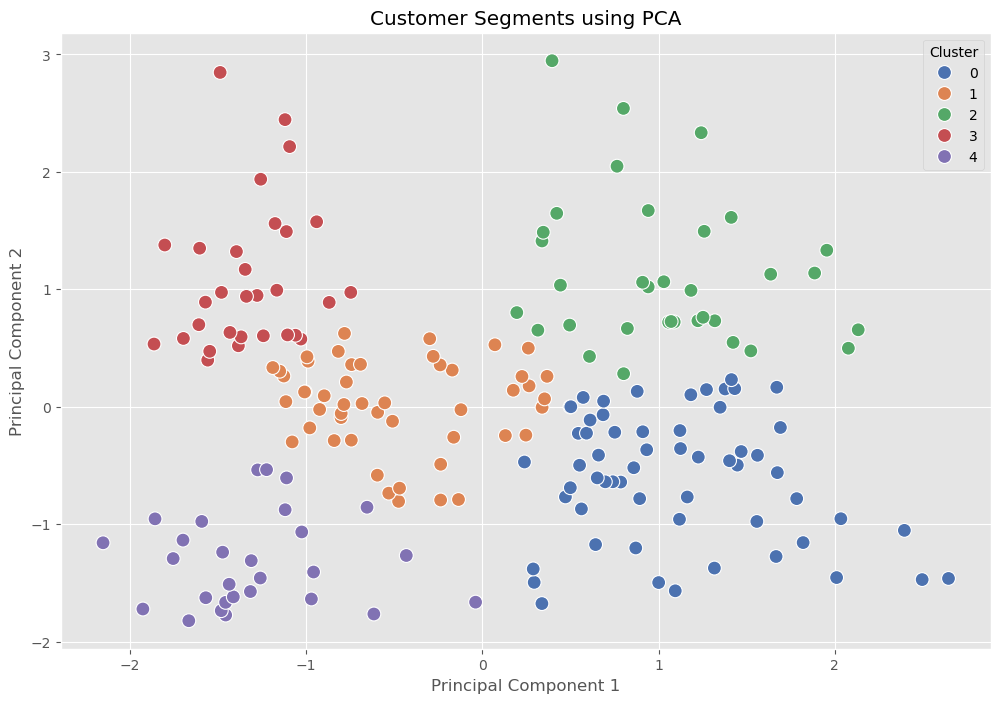

In [6]:
# Let's use 'Age', 'Annual Income', and 'Spending Score'
X_full = df.iloc[:, [2, 3, 4]]

# It's crucial to scale data before PCA and clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Visualize the PCA clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans_pca, palette='deep', s=100)
plt.title('Customer Segments using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()